# Thief Detector
## This task tests your Image Processing skills to build a motion detection algorithm that alarms you when you have an unwanted visitor in your home.

## Steps
- 1. Get the live video feed from your webcam
- 2. Fix a scene (the place you want to monitor) and store it as a reference background image
    - Store the first frame as the reference background frame
- 3. For every frame, check if there is any unwanted object inside the scene you are monitoring
    - Use **Background Subtraction** concept (**cv2.absdiff( )**)
        - Subtract the current frame from the reference background image(frame) to see the changes in the scene
        - If there is enormous amount of pixels distrubed in the subtraction result image
            - unwanted visitor (place is unsafe --> alarm the authorities)
        - If there is no enormous amount of pixels distrubed in the subtraction result image
            - no unwanted visitor (place is safe)
- 4. Output the text **"UNSAFE"** in **red** color on the top right of the frame when there is an intruder in the scene.
- 5. Save the live feed
- 6. Submit the (.ipynb) file

## Get live video feed from webcam [10 points]

In [2]:
import cv2

# Open the default camera
cap = cv2.VideoCapture(0)

## Read first frame, convert to Grayscale and store it as reference background image [10 points]

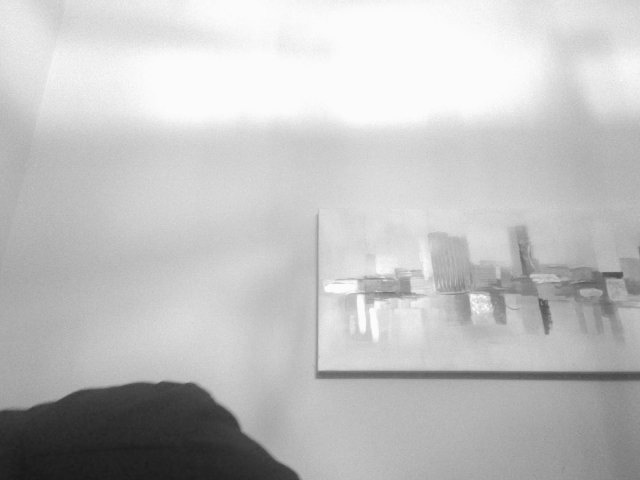

In [3]:
from IPython.display import display, Image

# Read the first frame from the camera
ret, first_frame = cap.read()

# Convert the first frame to grayscale
reference_background = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)


# Display the frame as an image in the notebook
display(Image(data=cv2.imencode('.jpg', reference_background)[1].tobytes()))

## Compute Absolute Difference between Current and First frame [20 points]

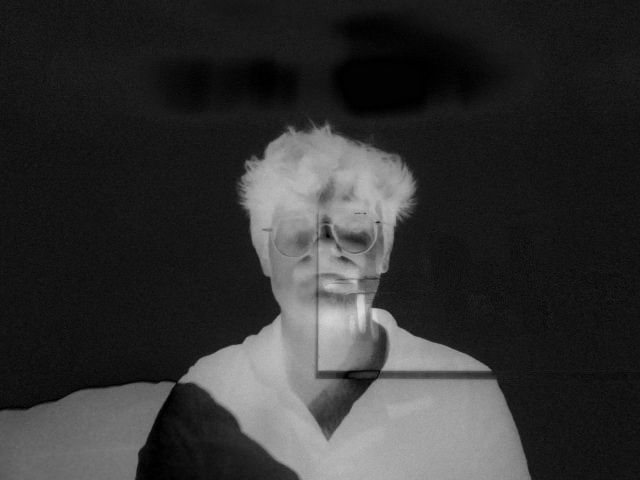

In [4]:
# Capture frame-by-frame
ret, frame = cap.read()

# Convert the current frame to grayscale
current_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Compute absolute difference between current and reference background frame
diff_frame = cv2.absdiff(current_frame, reference_background)

# Display the frame as an image in the notebook
display(Image(data=cv2.imencode('.jpg', diff_frame)[1].tobytes()))

## Apply threshold [5 points]

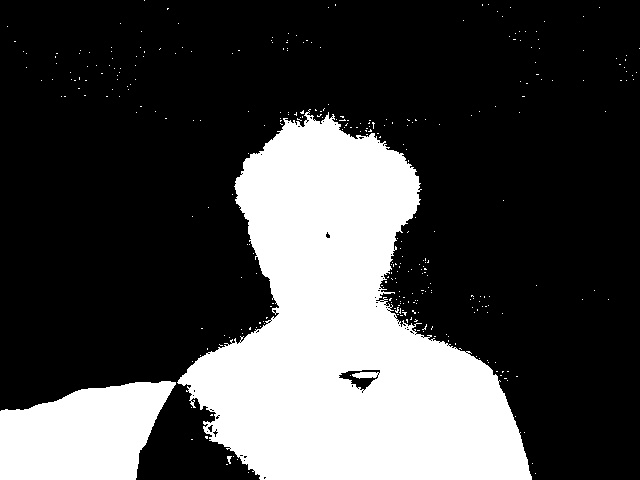

In [5]:
# Apply thresholding
_, thresholded_frame = cv2.threshold(diff_frame, 30, 255, cv2.THRESH_BINARY)

# Display the frame as an image in the notebook
display(Image(data=cv2.imencode('.jpg', thresholded_frame)[1].tobytes()))

## Find contours [10 points]

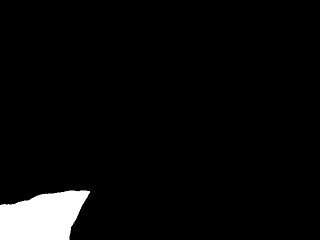

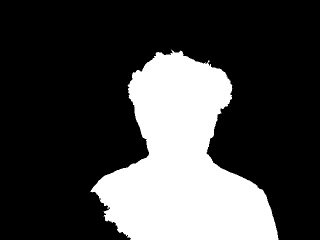

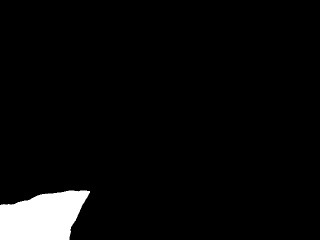

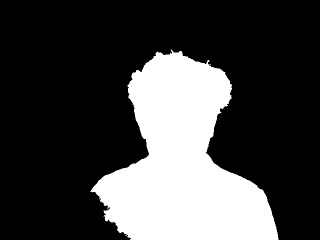

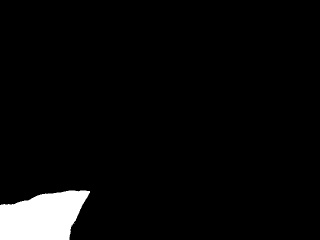

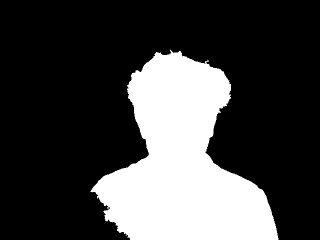

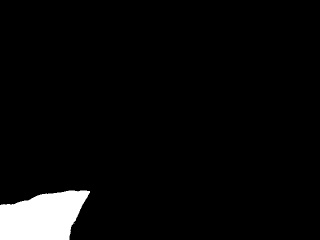

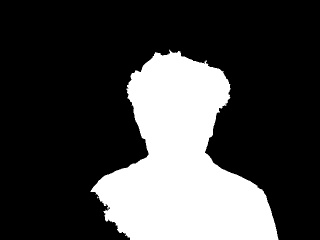

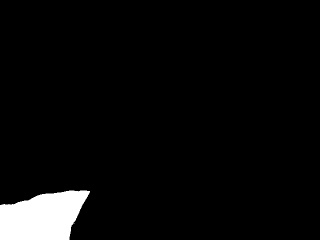

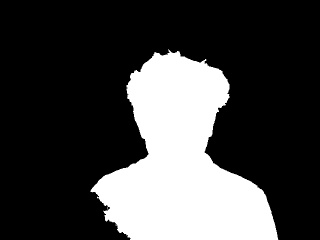

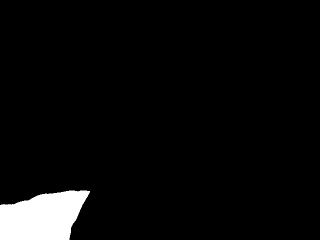

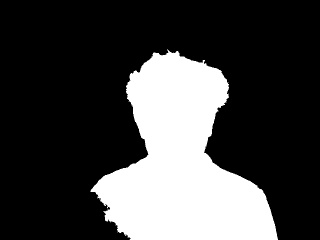

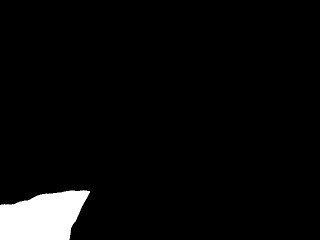

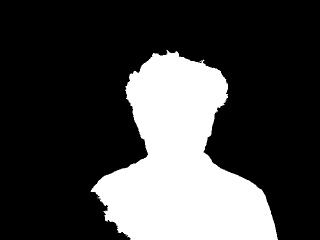

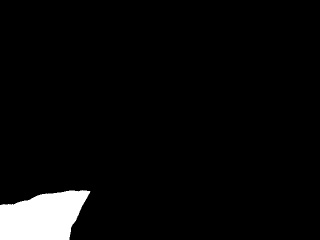

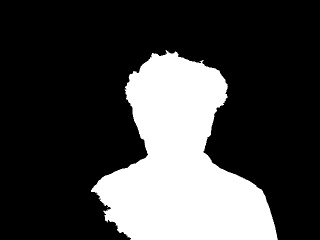

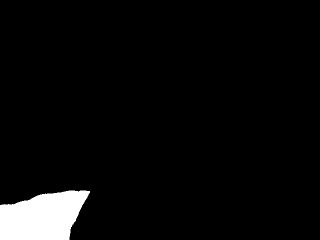

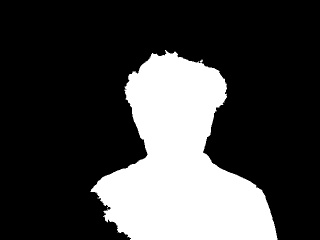

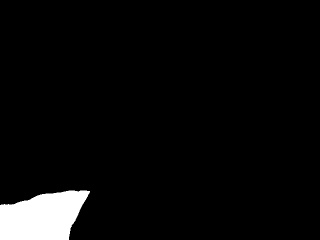

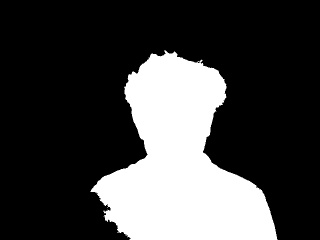

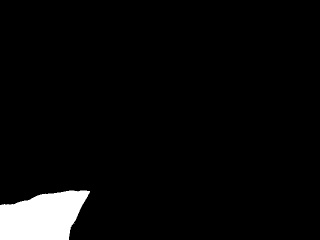

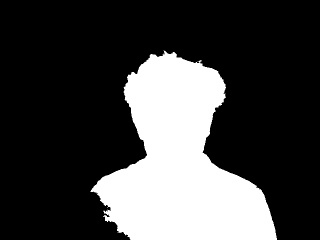

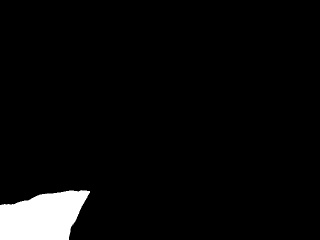

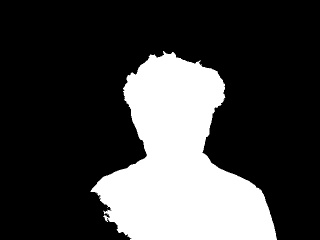

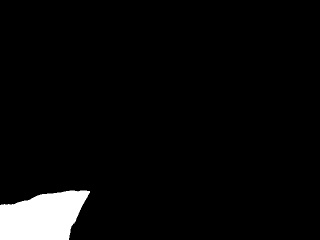

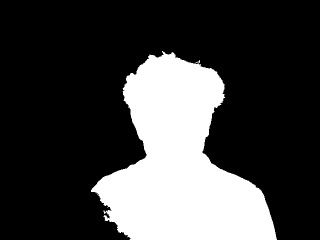

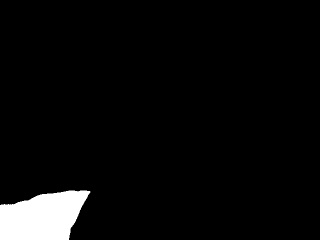

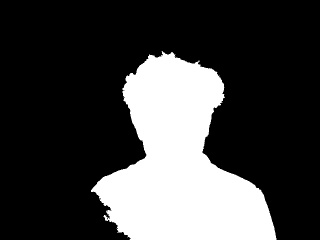

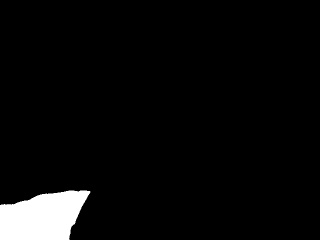

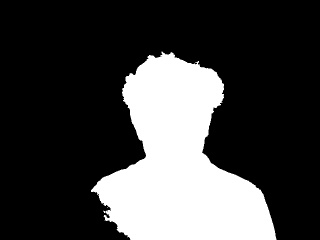

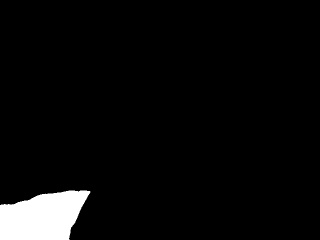

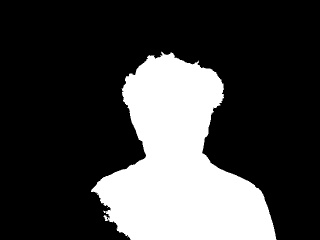

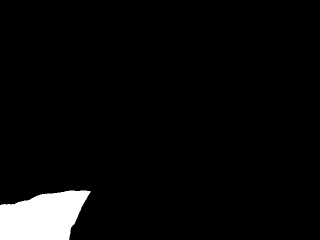

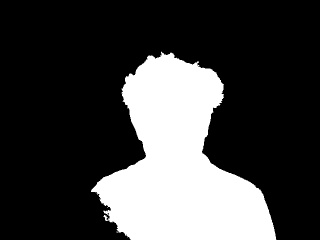

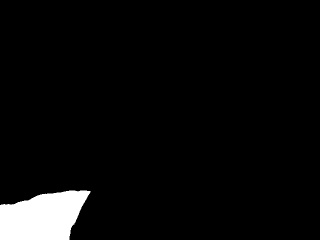

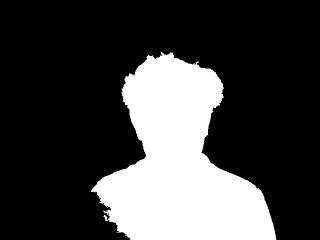

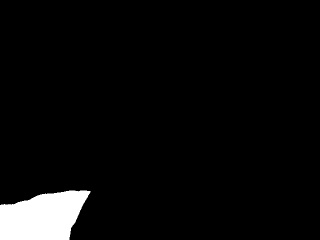

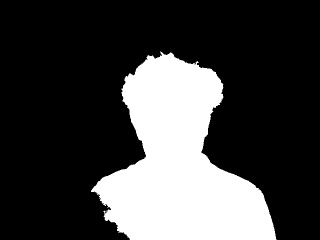

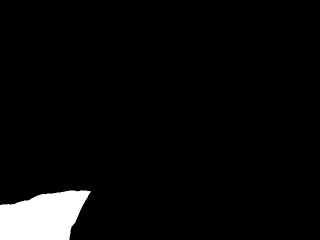

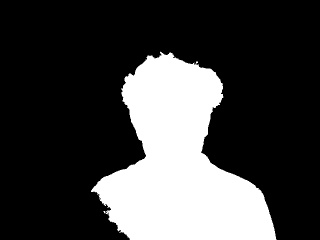

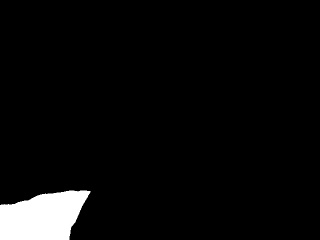

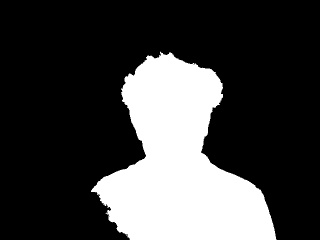

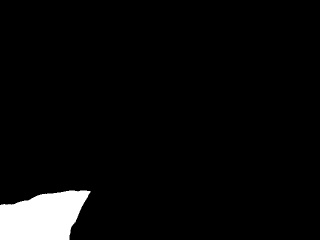

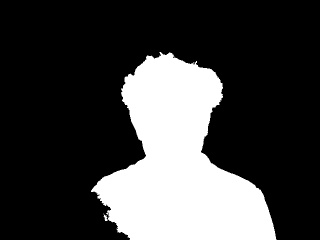

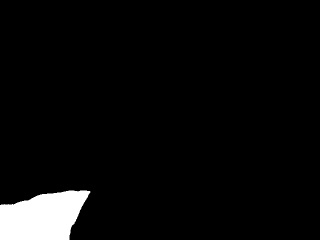

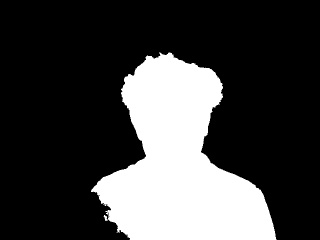

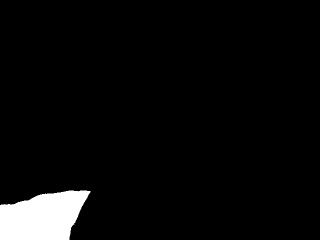

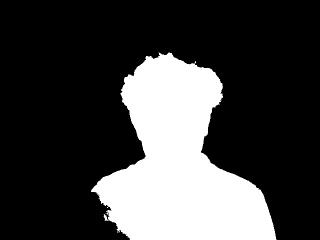

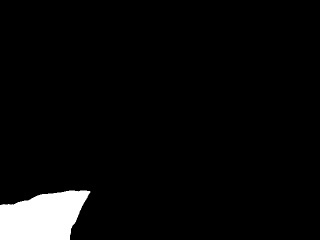

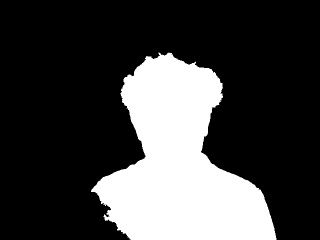

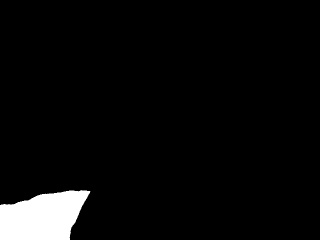

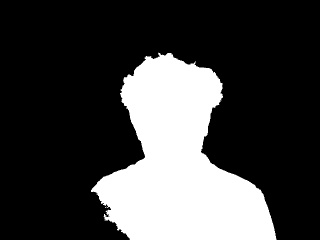

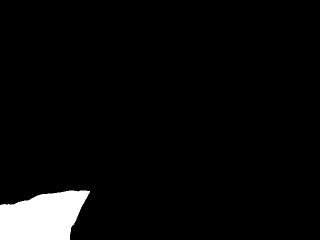

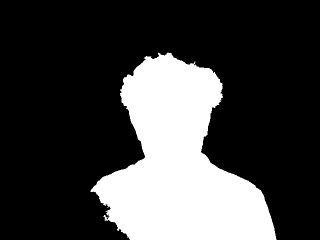

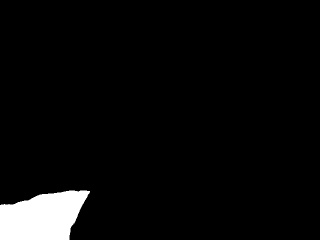

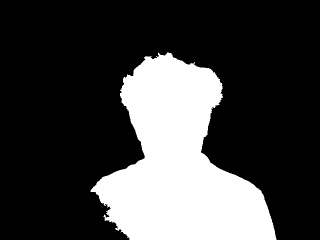

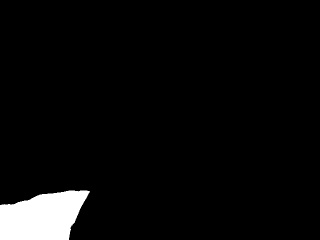

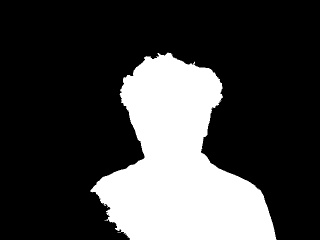

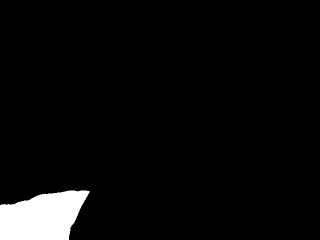

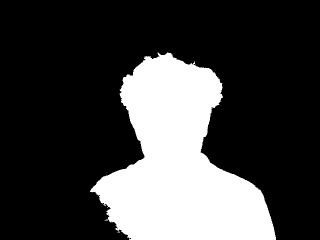

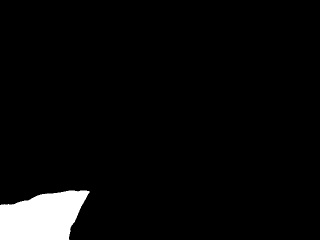

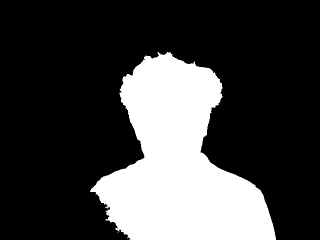

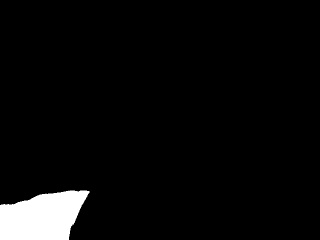

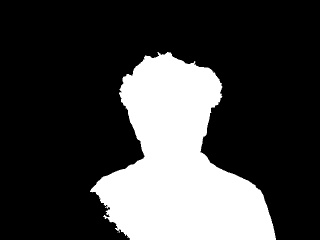

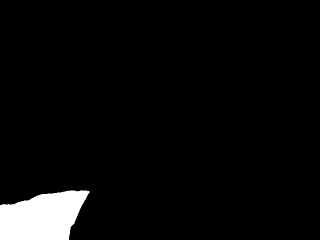

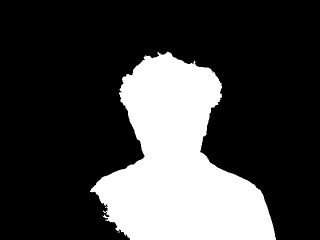

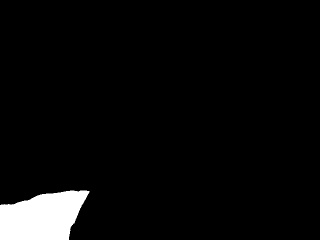

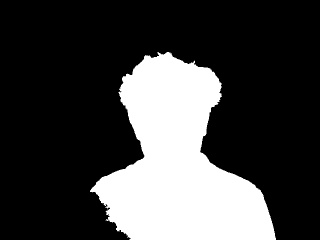

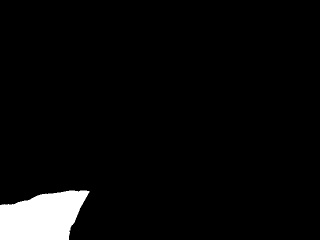

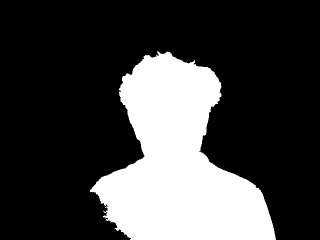

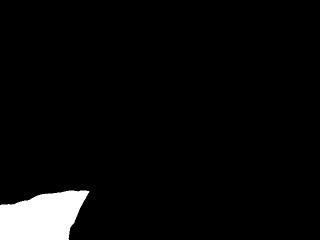

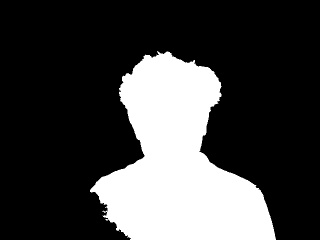

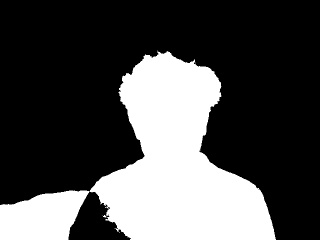

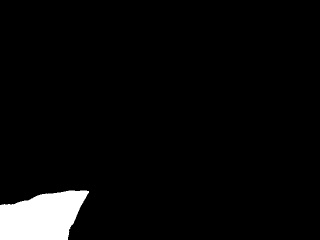

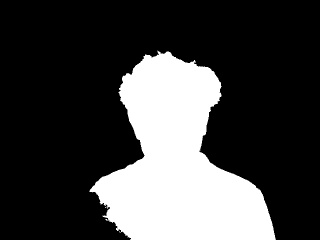

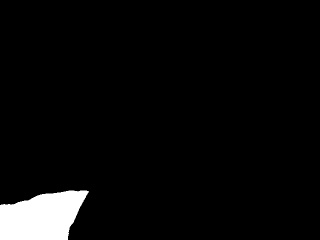

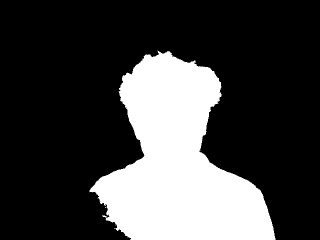

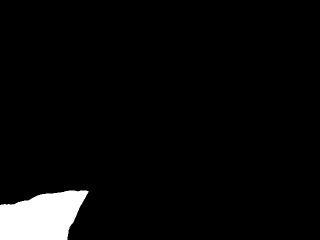

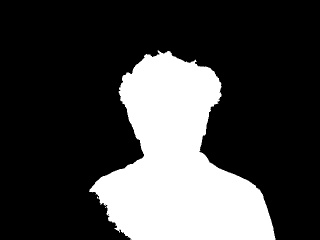

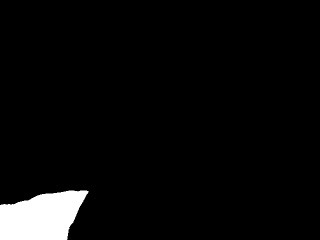

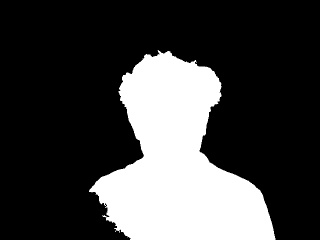

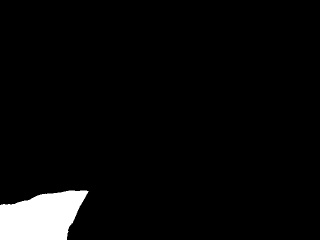

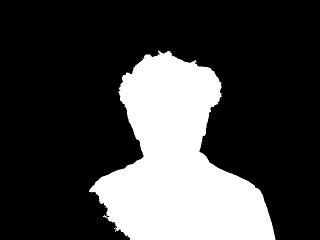

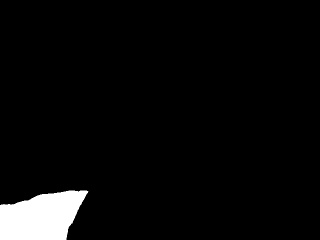

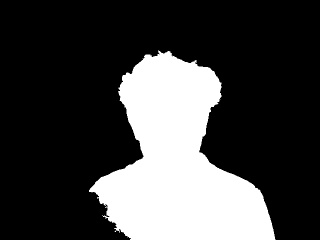

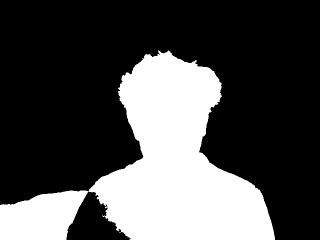

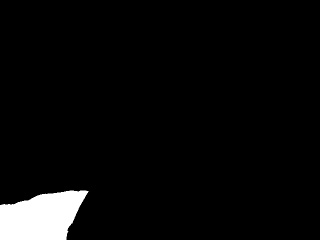

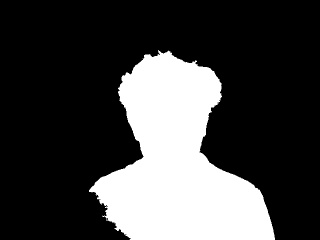

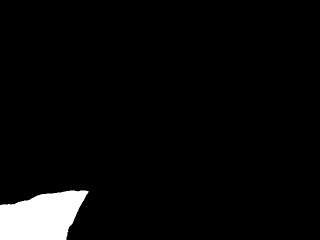

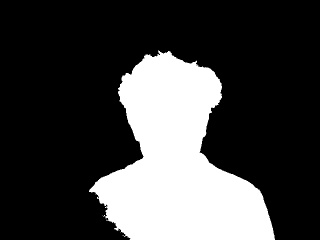

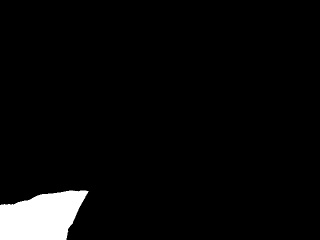

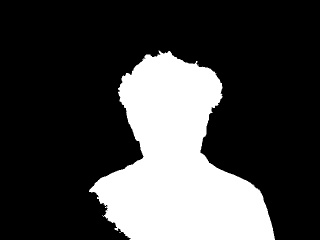

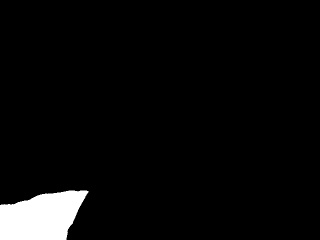

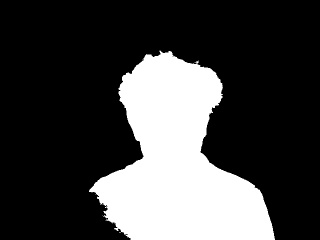

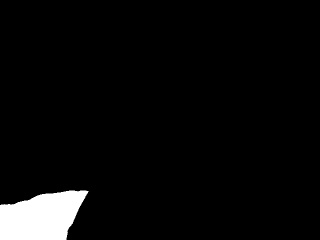

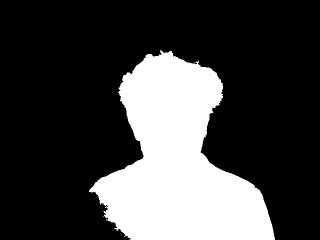

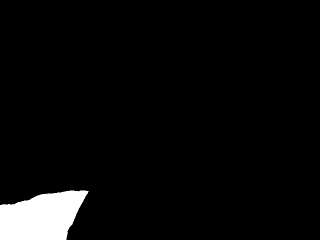

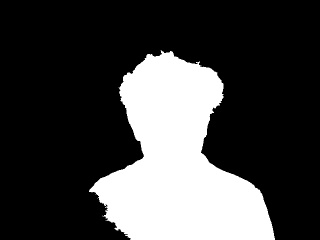

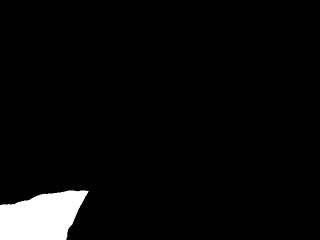

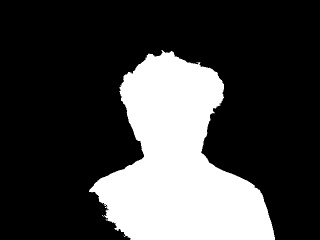

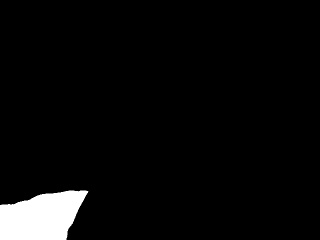

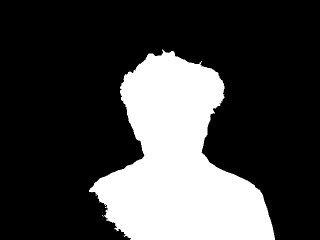

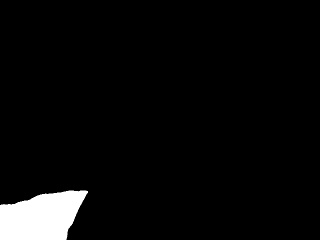

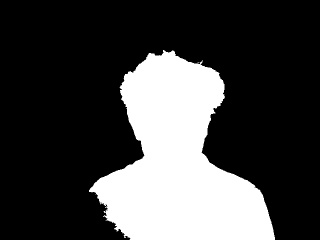

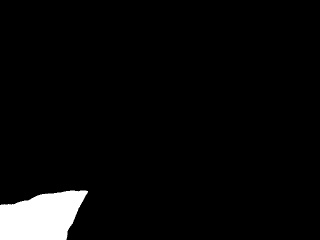

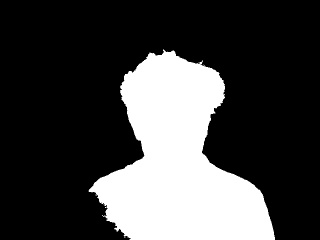

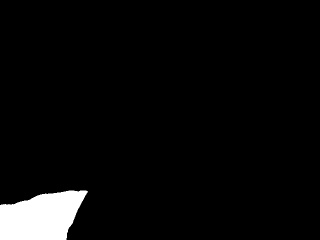

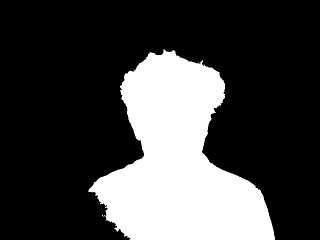

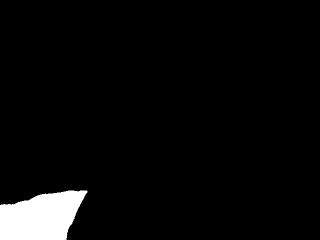

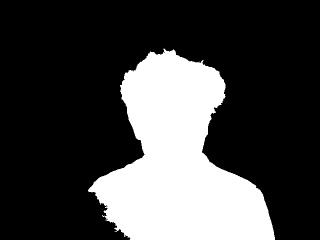

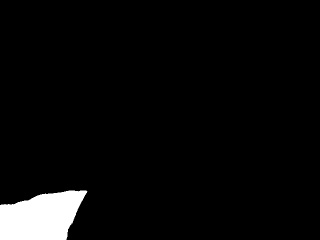

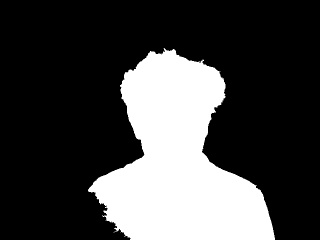

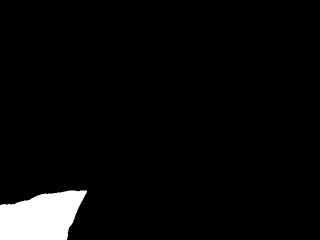

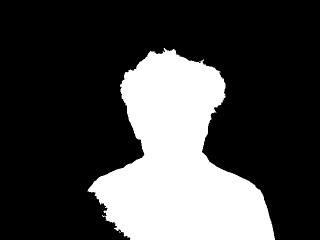

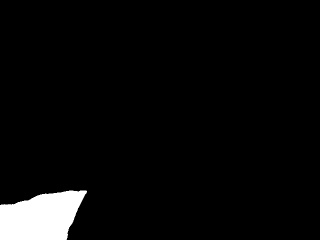

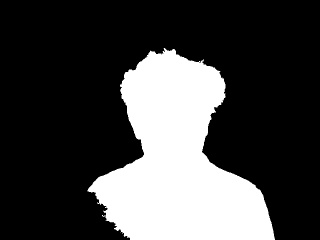

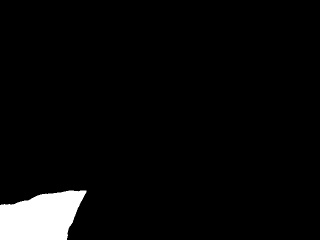

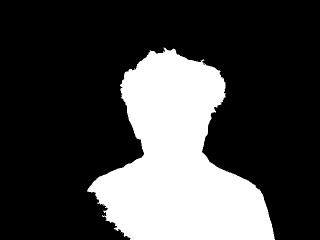

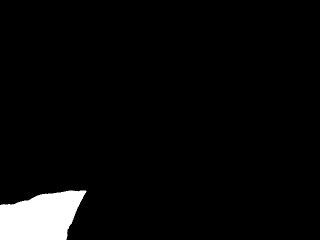

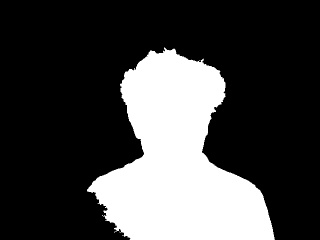

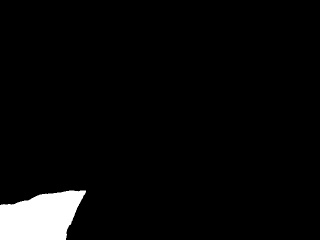

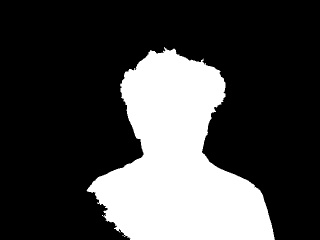

In [6]:
import cv2
import time
from IPython.display import display, Image
import numpy as np

# Define the duration for displaying the unsafe images (in seconds)
display_duration = 2

# Get the start time
start_time = time.time()

# Define the desired width and height for the displayed images
display_width = 320
display_height = 240

# Process frames from the camera for 5 seconds
while time.time() - start_time < display_duration:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If frame is read correctly, ret will be True
    if not ret:
        print("Error: Cannot read frame.")
        break

    # Convert the current frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference between current and reference background frame
    diff_frame = cv2.absdiff(gray_frame, reference_background)

    # Apply thresholding
    _, thresholded_frame = cv2.threshold(diff_frame, 30, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresholded_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Process each contour
    for i, contour in enumerate(contours):
        # Compute contour area
        area = cv2.contourArea(contour)

        # Check if contour area is large
        if area > 1000:  # Adjust the threshold area as needed
            # Draw contour on a black image
            contour_image = cv2.drawContours(np.zeros_like(gray_frame), contours, i, (255, 255, 255), thickness=cv2.FILLED)
            
            # Resize the frame for display
            contour_image = cv2.resize(contour_image, (display_width, display_height))
            
            # Display the contour image as an image in the notebook
            display(Image(data=cv2.imencode('.jpg', contour_image)[1].tobytes()))

## Check if contourArea is large and draw rectangle around the object, output "UNSAFE" text in red color [30 points]

In [7]:
import cv2
cap = cv2.VideoCapture(0)

# Process frames from the camera
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If frame is read correctly, ret will be True
    if not ret:
        print("Error: Cannot read frame.")
        break

    # Convert the current frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference between current and reference background frame
    diff_frame = cv2.absdiff(gray_frame, reference_background)

    # Apply thresholding
    _, thresholded_frame = cv2.threshold(diff_frame, 30, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresholded_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Process each contour
    for contour in contours:
        # Compute contour area
        area = cv2.contourArea(contour)

        # Check if contour area is large
        if area > 100000:  # Adjust the threshold area as needed
            # Draw rectangle around the object
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

            # Output "UNSAFE" text in red color
            cv2.putText(frame, "UNSAFE", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Display the frame with contours
    cv2.imshow('Frame', frame)

    # Exit the loop if a key is pressed
    if cv2.waitKey(1) != -1:
        break

KeyboardInterrupt: 

## Display images [10 points]

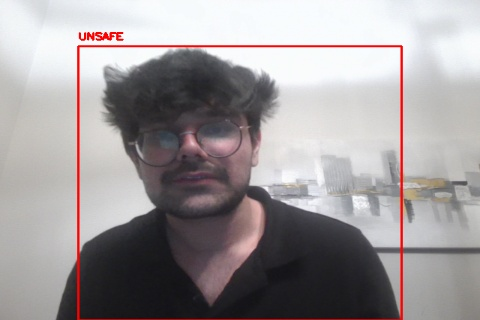

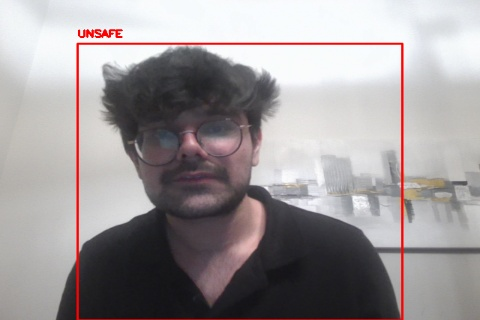

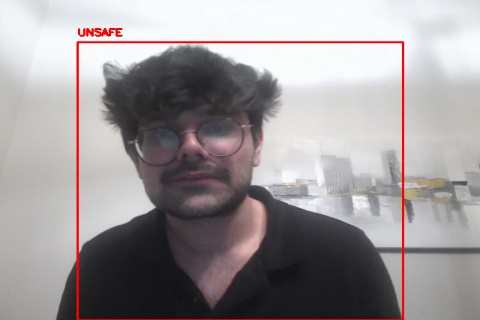

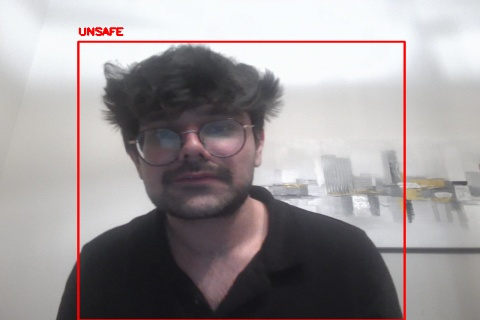

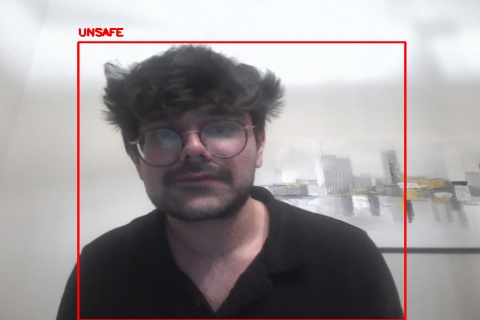

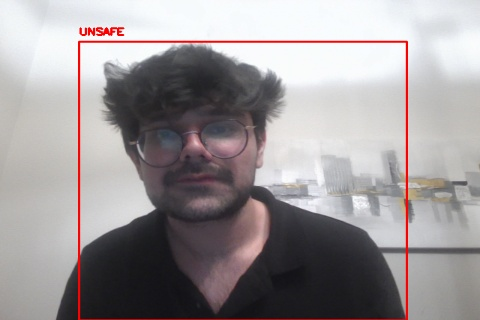

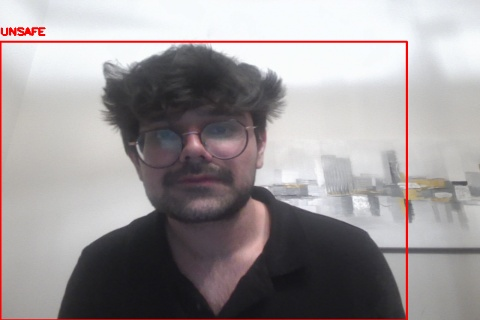

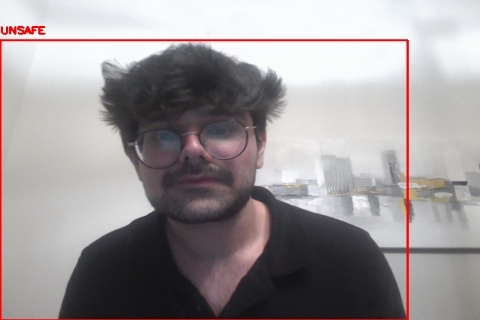

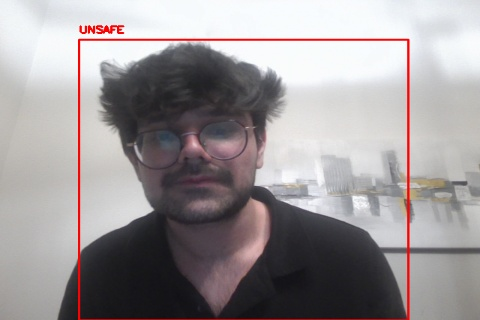

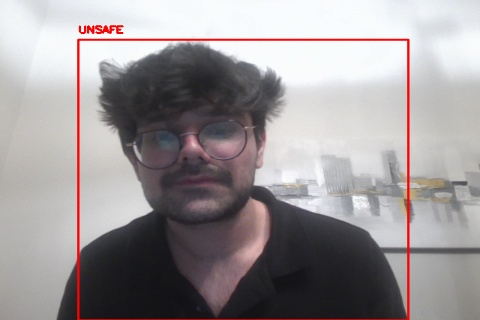

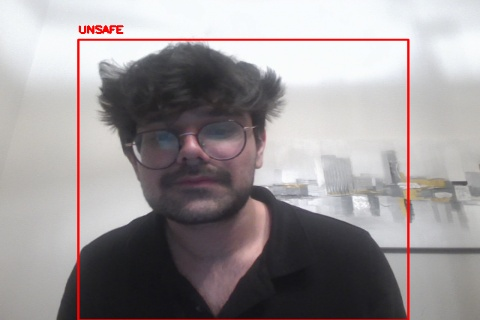

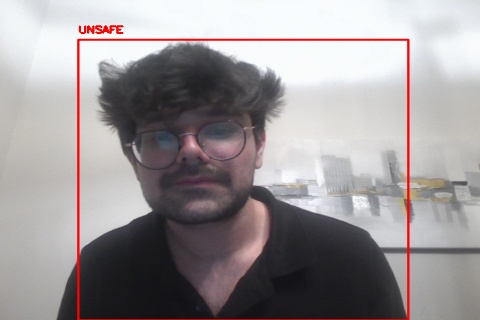

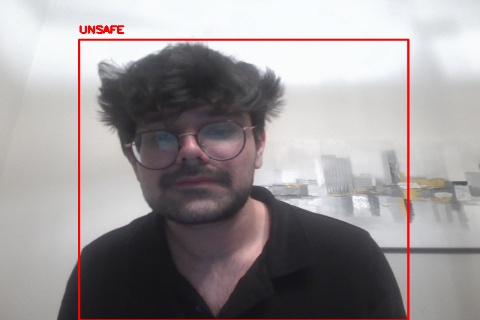

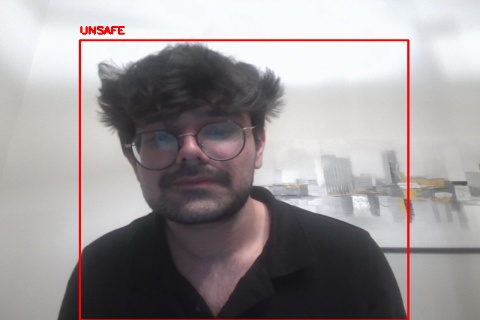

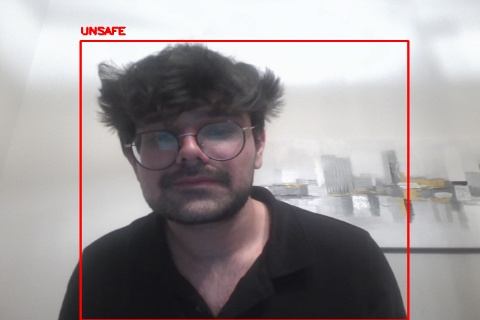

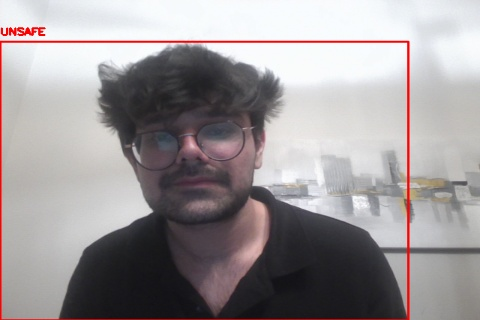

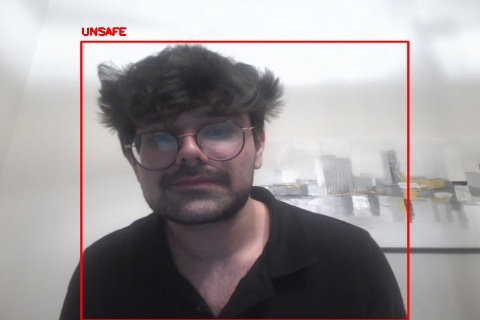

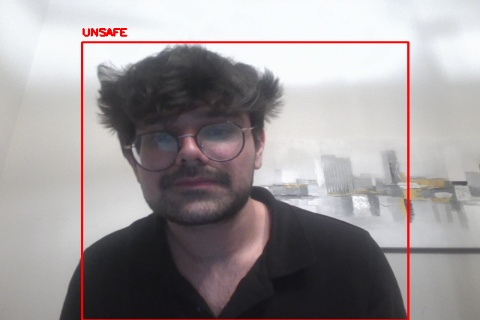

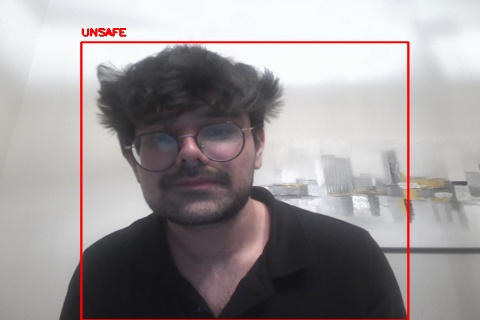

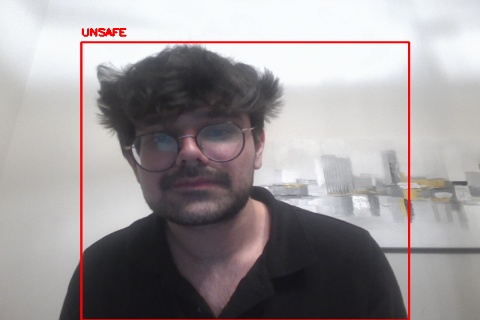

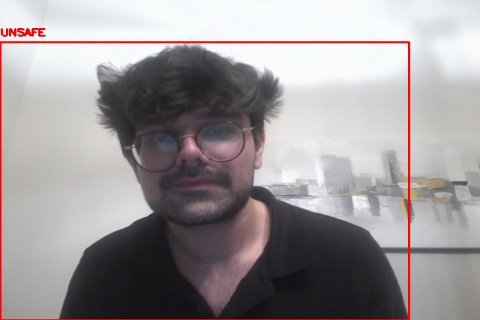

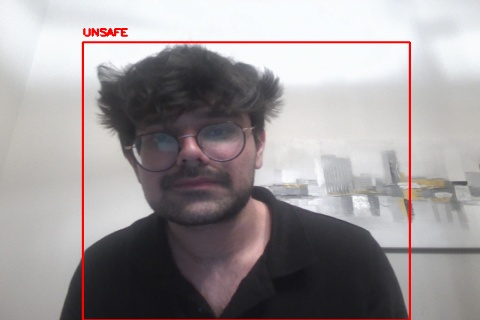

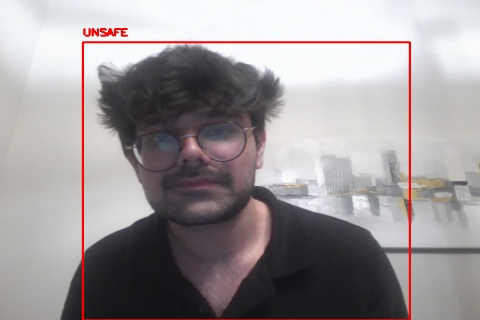

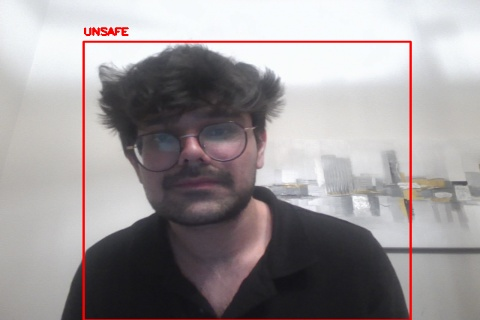

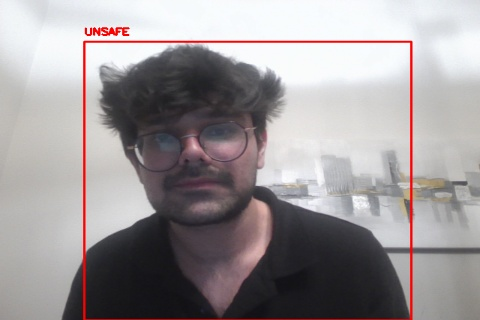

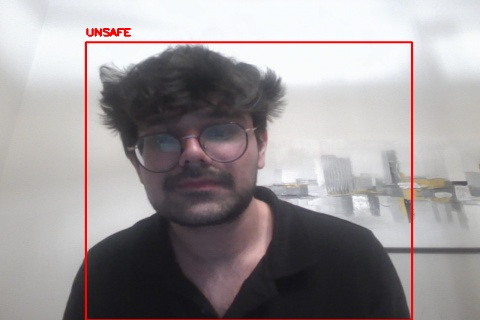

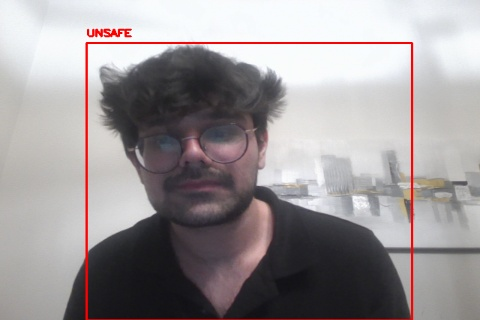

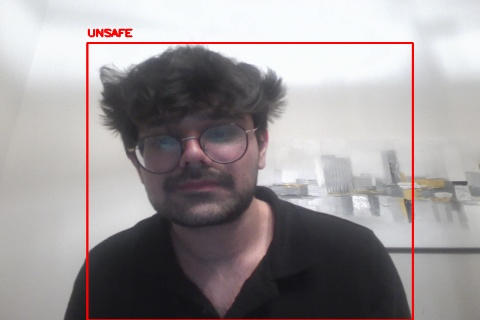

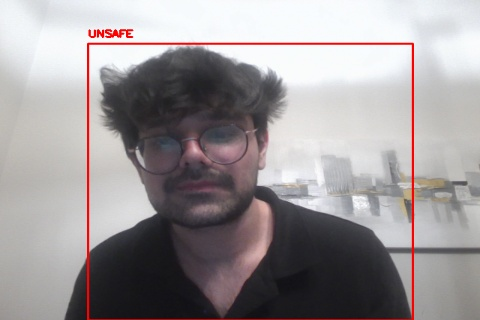

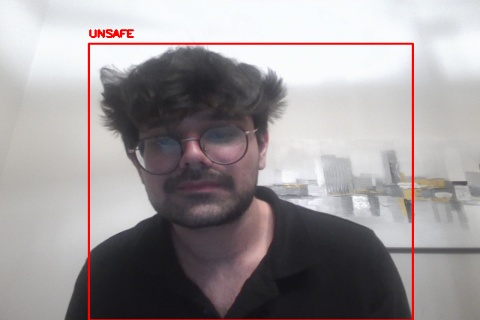

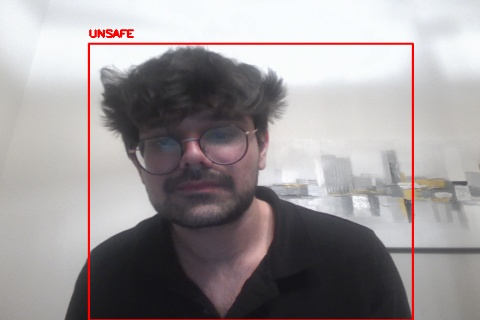

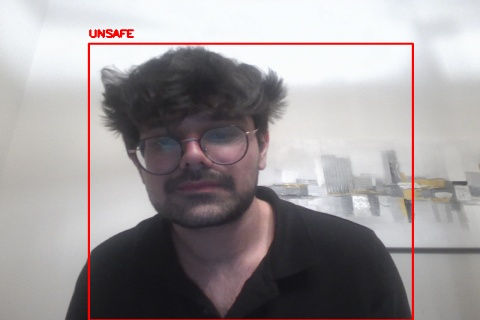

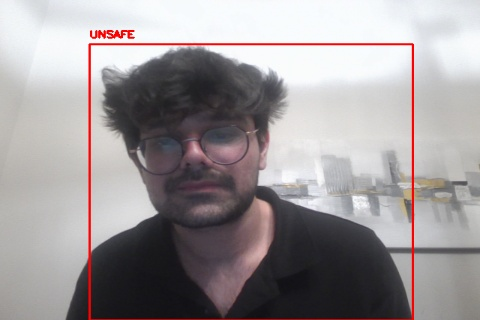

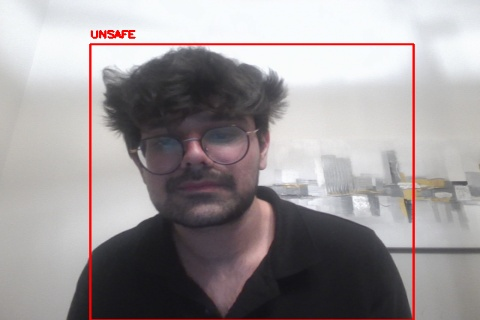

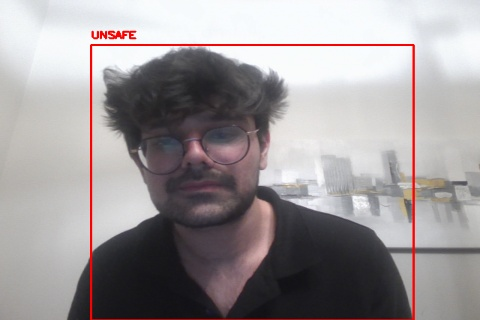

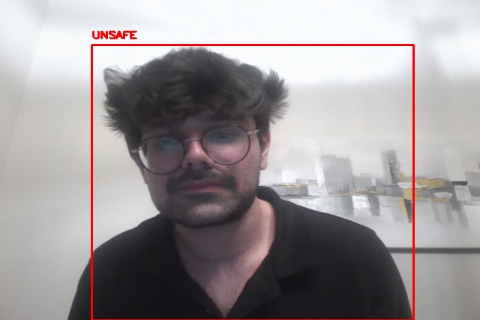

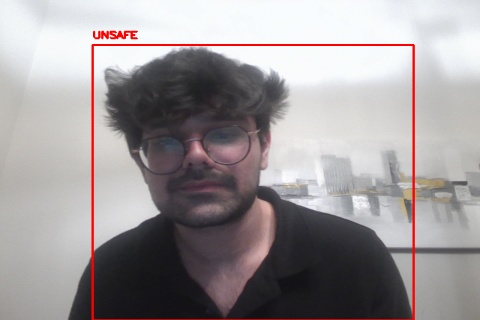

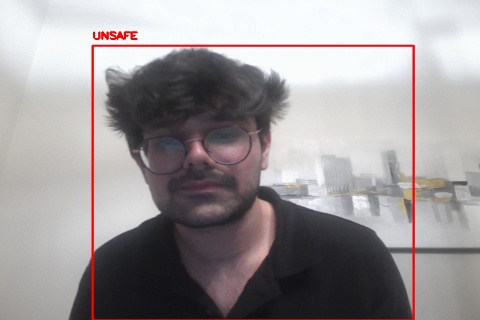

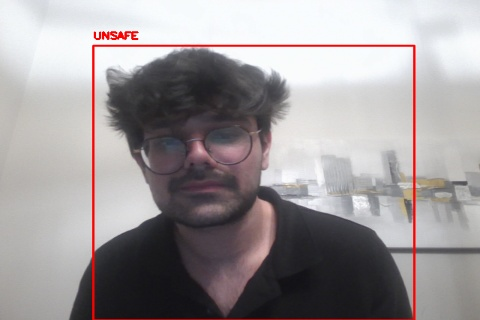

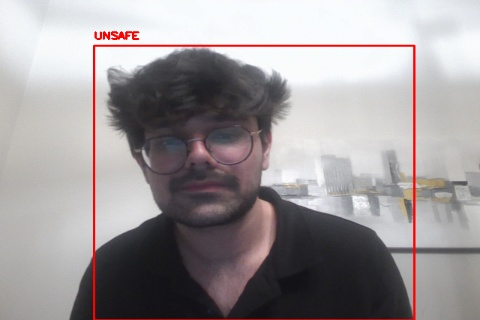

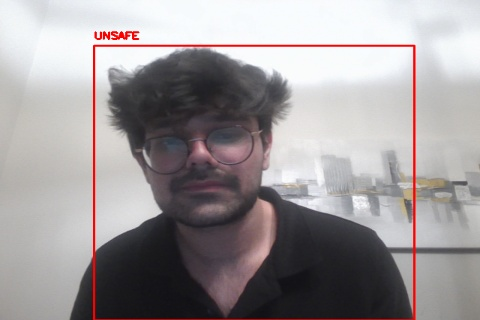

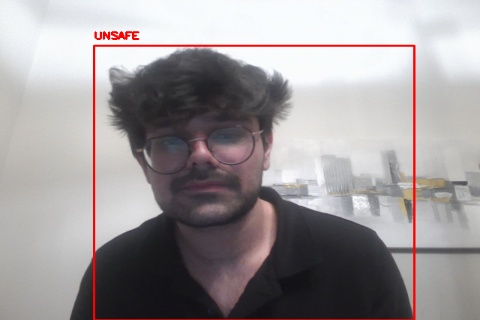

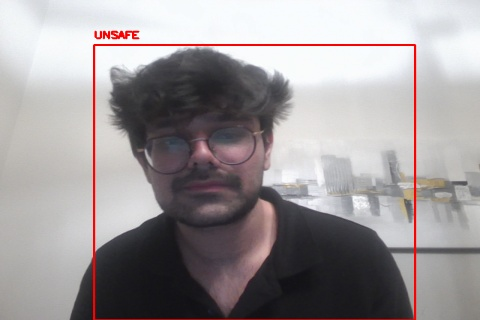

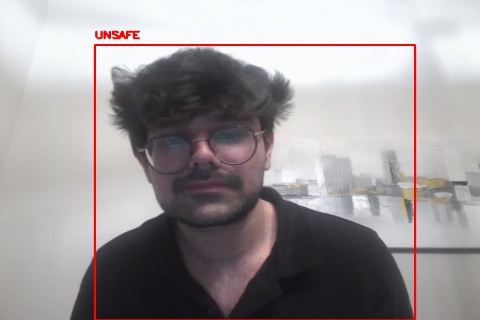

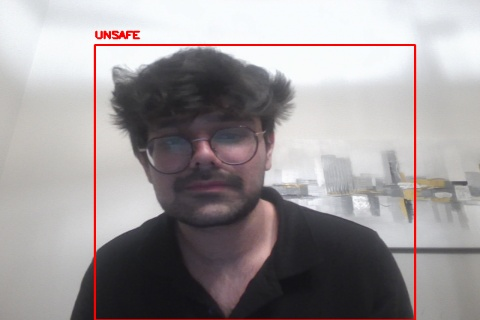

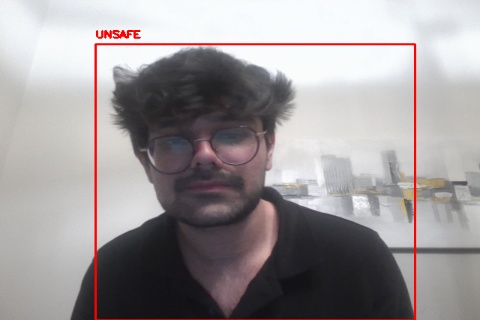

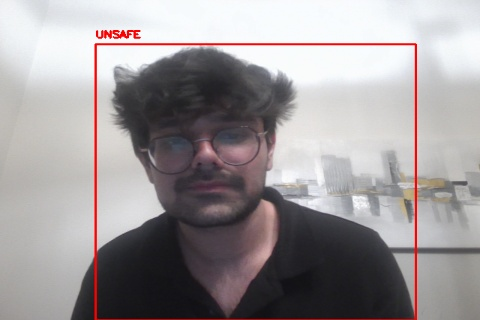

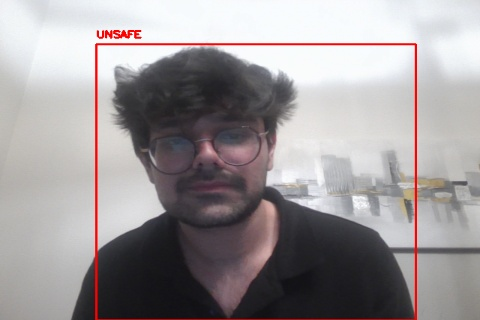

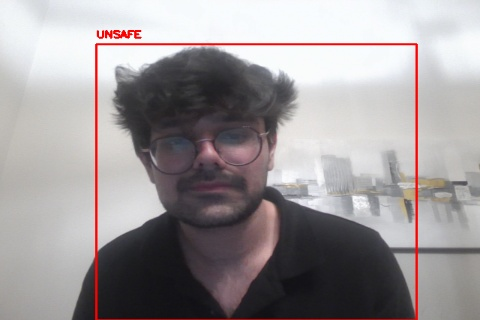

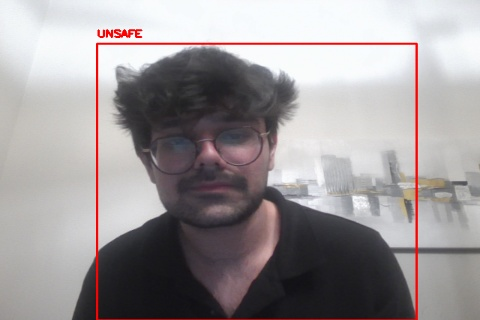

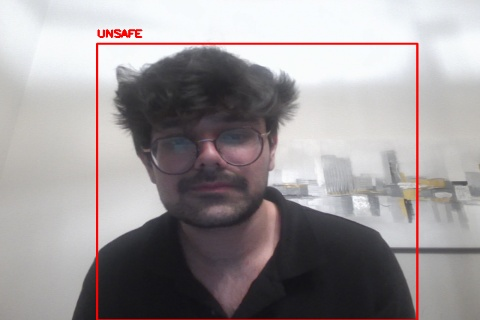

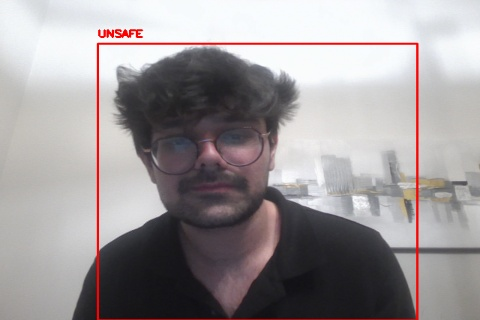

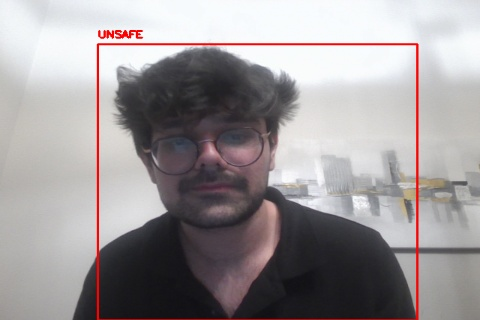

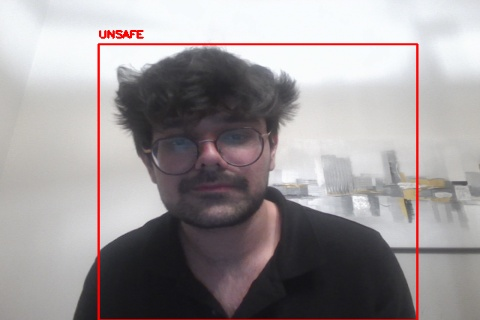

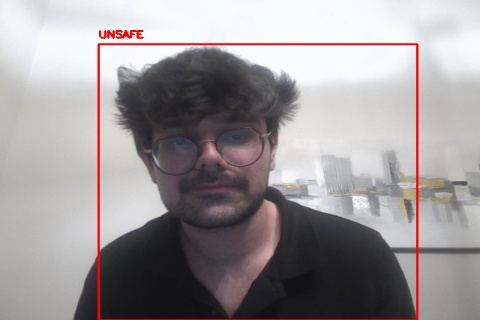

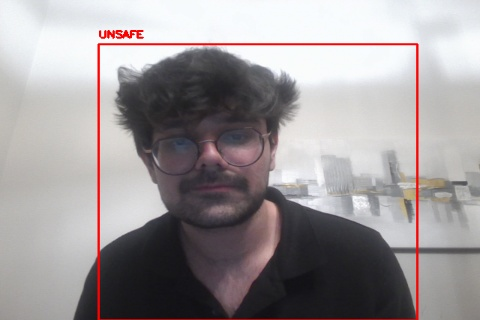

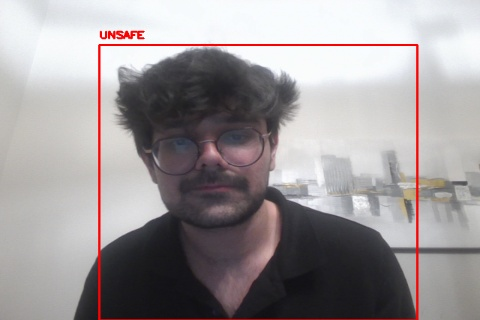

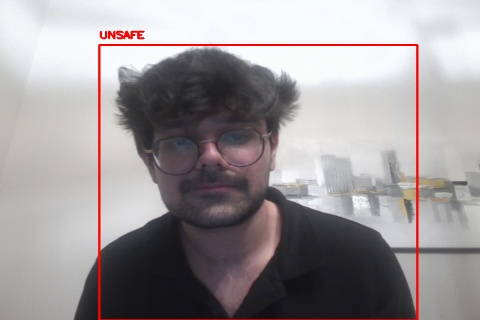

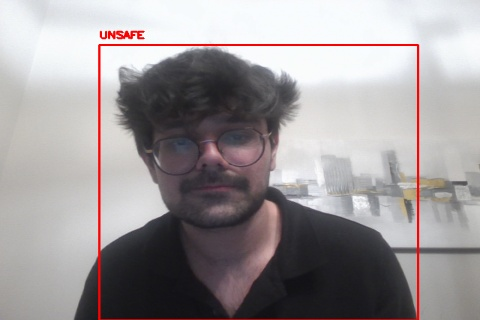

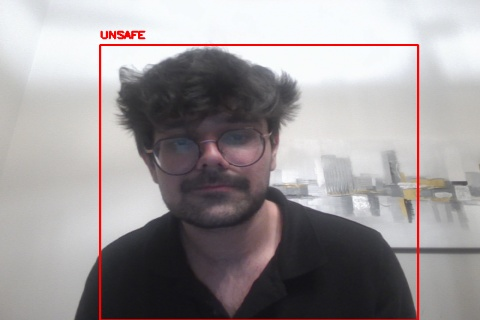

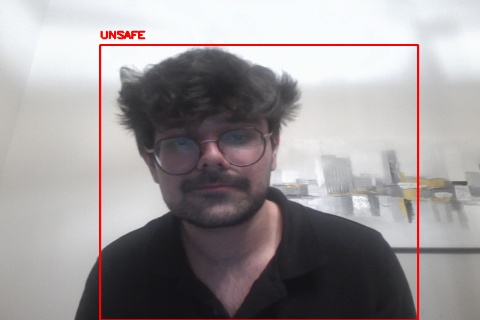

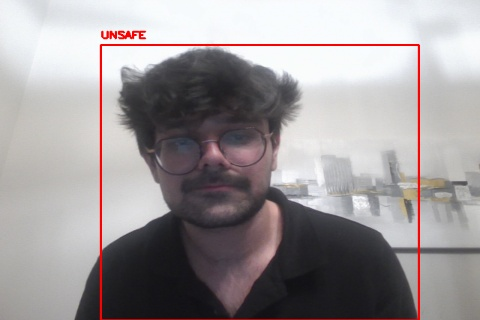

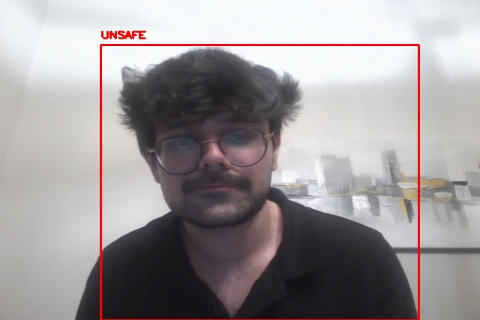

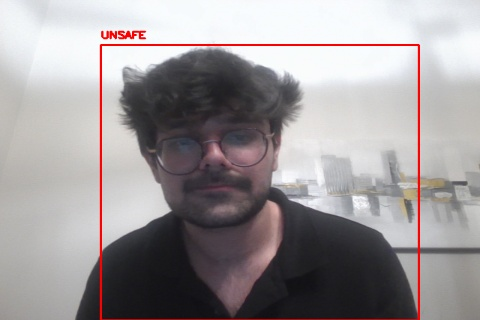

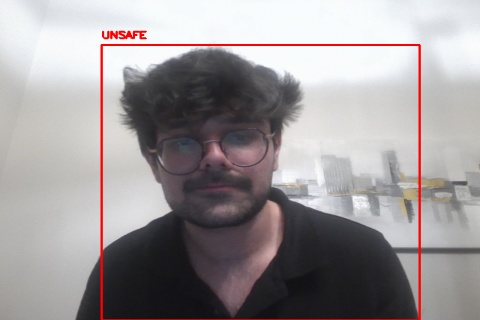

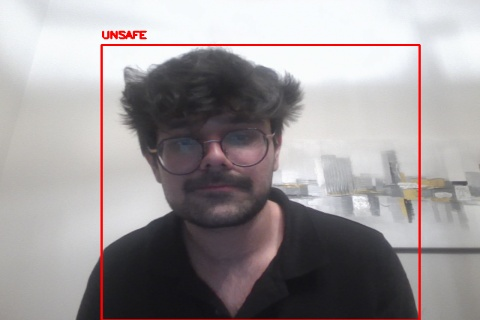

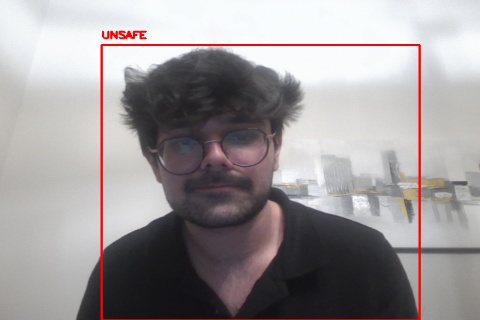

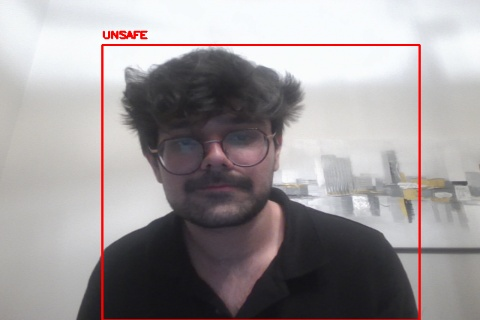

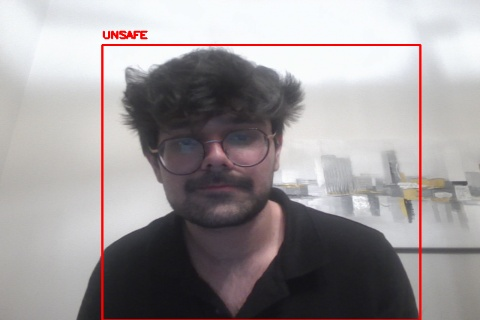

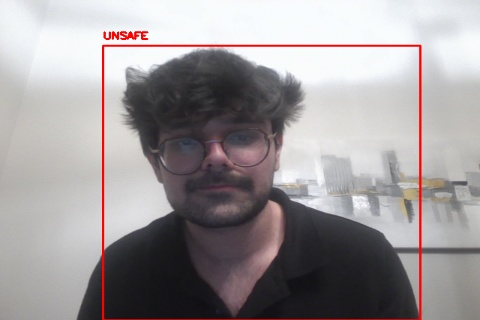

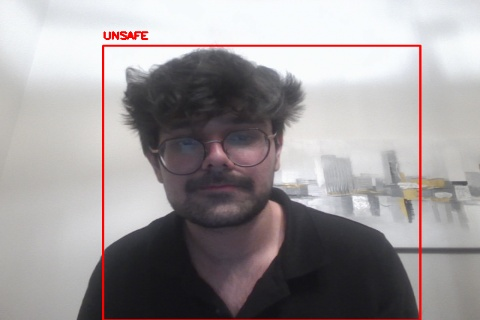

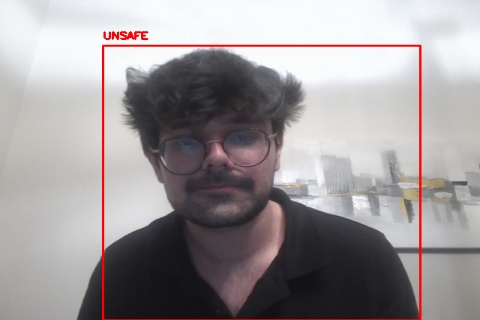

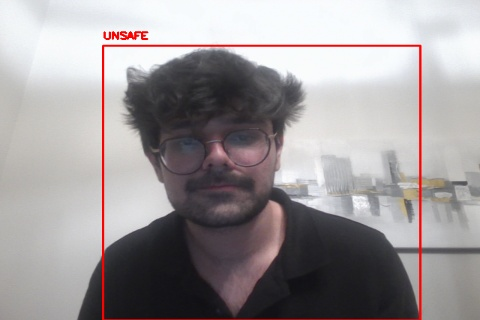

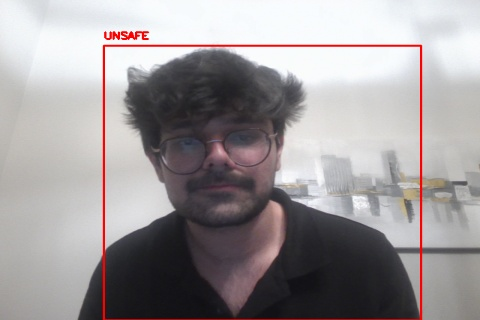

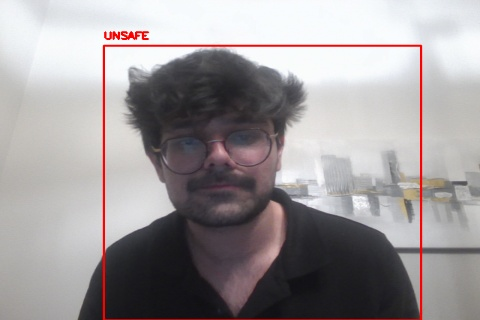

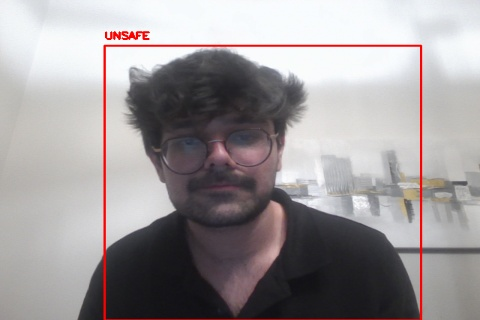

In [17]:
# Define the duration for displaying the unsafe images (in seconds)
display_duration = 5

# Define the desired width and height for the displayed images
display_width = 480
display_height = 320


# Get the start time
start_time = time.time()

# Process frames from the camera for 5 seconds
while time.time() - start_time < display_duration:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If frame is read correctly, ret will be True
    if not ret:
        print("Error: Cannot read frame.")
        break

    # Convert the current frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference between current and reference background frame
    diff_frame = cv2.absdiff(gray_frame, reference_background)

    # Apply thresholding
    _, thresholded_frame = cv2.threshold(diff_frame, 30, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresholded_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Process each contour
    for contour in contours:
        # Compute contour area
        area = cv2.contourArea(contour)

        # Check if contour area is large
        if area > 10000:  # Adjust the threshold area as needed
            # Draw rectangle around the object
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

            # Output "UNSAFE" text in red color
            cv2.putText(frame, "UNSAFE", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
            
            # Resize the frame for display
            frame = cv2.resize(frame, (display_width, display_height))

            # Display the frame as an image in the notebook
            display(Image(data=cv2.imencode('.jpg', frame)[1].tobytes()))

            # Exit the loop after displaying the image
            break

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

## Release objects [5 points]

In [18]:
cap.release()
cv2.destroyAllWindows()